## CSC 578 HW\#7 Intel Image Classification Competition (Fall 2023)

### Name: Sadiya Amreen 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

### Load the training data. Split into training 80% and validation 20%.

In [2]:
train_directory = '../input/csc-578-hw7-fall-2023/train'

img_height = 150
img_width = 150

train_dataset, valid_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',        # use names of subdirectories as target labels
    label_mode='categorical', # convert target class (int) to one-hot-vector
    validation_split=0.2,
    subset="both",
    seed=123,                 # use same random seed with valid_set
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
)

Found 13986 files belonging to 6 classes.
Using 11189 files for training.
Using 2797 files for validation.


2023-11-13 05:14:48.187408: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-13 05:14:48.187526: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-13 05:14:48.187605: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-13 05:14:48.187691: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-13 05:14:48.187771: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-13 05:14:48.188072: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-13 05:14:48.188186: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

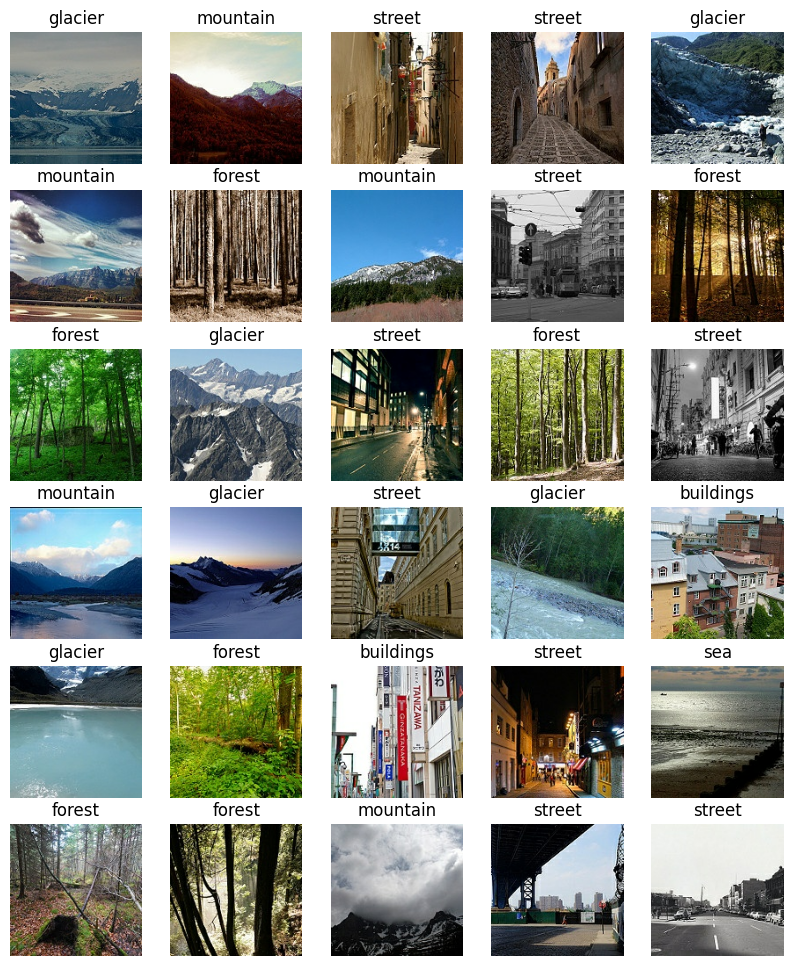

In [3]:
# Visualize some training examples.
plt.figure(figsize=(10, 12))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(30):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

### Define a model.

In [4]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])
#newmodel1 = keras.Sequential(data_augmentation)

In [5]:
# model 00: A relatively simple CNN model
model00 = keras.Sequential()
model00.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model00.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model00.add(keras.layers.MaxPooling2D(2,2))
model00.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model00.add(keras.layers.MaxPooling2D(2,2))
model00.add(keras.layers.Flatten())
model00.add(keras.layers.Dense(128, activation='relu'))
model00.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model00.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [6]:
# Print model summary to ensure
model00.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)            

In [7]:
# Fit the model.  We train for 3 epochs for now.
history00 = model00.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 27s 75ms/step - loss: 1.0425 - accuracy: 0.6094 - val_loss: 0.8275 - val_accuracy: 0.6657
Epoch 2/3
350/350 [==============================] - 26s 73ms/step - loss: 0.6691 - accuracy: 0.7598 - val_loss: 0.6753 - val_accuracy: 0.7512
Epoch 3/3
350/350 [==============================] - 25s 72ms/step - loss: 0.4718 - accuracy: 0.8335 - val_loss: 0.6415 - val_accuracy: 0.7801


In [8]:
# model 01 : adding additional layer
model01 = keras.Sequential()
model01.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model01.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model01.add(keras.layers.MaxPooling2D(2,2))
model01.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))# additional layer
model01.add(keras.layers.MaxPooling2D(2,2))
model01.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model01.add(keras.layers.MaxPooling2D(2,2))

model01.add(keras.layers.Flatten())
model01.add(keras.layers.Dense(128, activation='relu'))
model01.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model01.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
# Fit the model.  We train for 3 epochs for now.
history01 = model01.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 26s 72ms/step - loss: 0.9704 - accuracy: 0.6292 - val_loss: 0.9030 - val_accuracy: 0.6779
Epoch 2/3
350/350 [==============================] - 25s 71ms/step - loss: 0.6882 - accuracy: 0.7484 - val_loss: 0.6449 - val_accuracy: 0.7555
Epoch 3/3
350/350 [==============================] - 26s 73ms/step - loss: 0.5721 - accuracy: 0.7896 - val_loss: 0.5845 - val_accuracy: 0.7887


In [10]:
# model 02 : adding additional layer + padding
model02 = keras.Sequential()
model02.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model02.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model02.add(keras.layers.MaxPooling2D(2,2))
model02.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model02.add(keras.layers.MaxPooling2D(2,2))
model02.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model02.add(keras.layers.MaxPooling2D(2,2))

model02.add(keras.layers.Flatten())
model02.add(keras.layers.Dense(128, activation='relu'))
model02.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model02.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
# Fit the model.  We train for 3 epochs for now.
history02 = model02.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 28s 76ms/step - loss: 1.0050 - accuracy: 0.6117 - val_loss: 0.7821 - val_accuracy: 0.7065
Epoch 2/3
350/350 [==============================] - 27s 76ms/step - loss: 0.6982 - accuracy: 0.7449 - val_loss: 0.6670 - val_accuracy: 0.7569
Epoch 3/3
350/350 [==============================] - 25s 73ms/step - loss: 0.5659 - accuracy: 0.7946 - val_loss: 0.6202 - val_accuracy: 0.7726


In [12]:
# model 03 : adding additional layer + padding + strides
model03 = keras.Sequential()
model03.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model03.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model03.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model03.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model03.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model03.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model03.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))

model03.add(keras.layers.Flatten())
model03.add(keras.layers.Dense(128, activation='relu'))
model03.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model03.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
# Fit the model.  We train for 3 epochs for now.
history03 = model03.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 27s 75ms/step - loss: 0.9498 - accuracy: 0.6312 - val_loss: 0.9008 - val_accuracy: 0.6543
Epoch 2/3
350/350 [==============================] - 27s 77ms/step - loss: 0.6554 - accuracy: 0.7623 - val_loss: 0.5829 - val_accuracy: 0.7901
Epoch 3/3
350/350 [==============================] - 27s 77ms/step - loss: 0.4969 - accuracy: 0.8204 - val_loss: 0.6281 - val_accuracy: 0.7855


In [14]:
# model 04 : adding additional layer + padding + strides + spatial dropout to all
model04 = keras.Sequential()
model04.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model04.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model04.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model04.add(keras.layers.SpatialDropout2D(0.25))
model04.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model04.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model04.add(keras.layers.SpatialDropout2D(0.25))
model04.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model04.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model04.add(keras.layers.SpatialDropout2D(0.25))

model04.add(keras.layers.Flatten())
model04.add(keras.layers.Dense(128, activation='relu'))
model04.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model04.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
# Fit the model.  We train for 3 epochs for now.
history04 = model04.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 29s 80ms/step - loss: 1.3065 - accuracy: 0.4730 - val_loss: 0.9476 - val_accuracy: 0.6596
Epoch 2/3
350/350 [==============================] - 28s 81ms/step - loss: 0.9506 - accuracy: 0.6341 - val_loss: 0.8600 - val_accuracy: 0.6646
Epoch 3/3
350/350 [==============================] - 28s 79ms/step - loss: 0.8459 - accuracy: 0.6808 - val_loss: 0.7310 - val_accuracy: 0.7193


In [16]:
# model 05 : adding additional layer + padding + strides + spatial dropout to 1st
model05 = keras.Sequential()
model05.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model05.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model05.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model05.add(keras.layers.SpatialDropout2D(0.25))
model05.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model05.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model05.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model05.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))

model05.add(keras.layers.Flatten())
model05.add(keras.layers.Dense(128, activation='relu'))
model05.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model05.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
# Fit the model.  We train for 3 epochs for now.
history05 = model05.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 27s 74ms/step - loss: 1.1128 - accuracy: 0.5651 - val_loss: 0.8439 - val_accuracy: 0.6868
Epoch 2/3
350/350 [==============================] - 26s 75ms/step - loss: 0.7822 - accuracy: 0.7060 - val_loss: 0.7768 - val_accuracy: 0.7179
Epoch 3/3
350/350 [==============================] - 26s 74ms/step - loss: 0.6494 - accuracy: 0.7584 - val_loss: 0.6511 - val_accuracy: 0.7698


In [18]:
from keras.layers import BatchNormalization 
# model 06 : adding additional layer + padding + strides + batch normalization to all
model06 = keras.Sequential()
model06.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model06.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model06.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model06.add(BatchNormalization())
model06.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model06.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model06.add(BatchNormalization())
model06.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model06.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model06.add(BatchNormalization())

model06.add(keras.layers.Flatten())
model06.add(keras.layers.Dense(128, activation='relu'))
model06.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model06.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
# Fit the model.  We train for 3 epochs for now.
history06 = model06.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 31s 86ms/step - loss: 0.9549 - accuracy: 0.6776 - val_loss: 2.6117 - val_accuracy: 0.4448
Epoch 2/3
350/350 [==============================] - 30s 87ms/step - loss: 0.5128 - accuracy: 0.8132 - val_loss: 1.1125 - val_accuracy: 0.6625
Epoch 3/3
350/350 [==============================] - 30s 86ms/step - loss: 0.3540 - accuracy: 0.8706 - val_loss: 0.8763 - val_accuracy: 0.7329


In [20]:
# model 07 : adding additional layer + padding + strides + batch normalization to all
#adamax 
from tensorflow.keras.optimizers import Adamax
model07 = keras.Sequential()
model07.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model07.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model07.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model07.add(BatchNormalization())
model07.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model07.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model07.add(BatchNormalization())
model07.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model07.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model07.add(BatchNormalization())

model07.add(keras.layers.Flatten())
model07.add(keras.layers.Dense(128, activation='relu'))
model07.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adamax(learning_rate = 0.001)  # set learning rate (same as default for now)
model07.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
# Fit the model.  We train for 3 epochs for now.
history07 = model07.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 31s 86ms/step - loss: 0.9255 - accuracy: 0.6848 - val_loss: 3.1990 - val_accuracy: 0.4151
Epoch 2/3
350/350 [==============================] - 29s 84ms/step - loss: 0.3909 - accuracy: 0.8610 - val_loss: 1.1831 - val_accuracy: 0.6375
Epoch 3/3
350/350 [==============================] - 29s 84ms/step - loss: 0.2069 - accuracy: 0.9345 - val_loss: 0.8090 - val_accuracy: 0.7526


In [22]:
# model 08 : adding additional layer + padding + strides + batch normalization to all
#adagrad
from tensorflow.keras.optimizers import Adagrad
model08 = keras.Sequential()
model08.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model08.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model08.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model08.add(BatchNormalization())
model08.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model08.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model08.add(BatchNormalization())
model08.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model08.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model08.add(BatchNormalization())

model08.add(keras.layers.Flatten())
model08.add(keras.layers.Dense(128, activation='relu'))
model08.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adagrad(learning_rate = 0.001)  # set learning rate (same as default for now)
model08.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
# Fit the model.  We train for 3 epochs for now.
history08 = model08.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 31s 86ms/step - loss: 0.9952 - accuracy: 0.6281 - val_loss: 2.0497 - val_accuracy: 0.3339
Epoch 2/3
350/350 [==============================] - 30s 87ms/step - loss: 0.6420 - accuracy: 0.7689 - val_loss: 0.7200 - val_accuracy: 0.7290
Epoch 3/3
350/350 [==============================] - 30s 86ms/step - loss: 0.5112 - accuracy: 0.8189 - val_loss: 0.6701 - val_accuracy: 0.7533


In [24]:
# model 09 : adding additional layer + padding + strides + batch normalization to all
#adadelta
from tensorflow.keras.optimizers import Adadelta
model09 = keras.Sequential()
model09.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model09.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model09.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model09.add(BatchNormalization())
model09.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model09.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model09.add(BatchNormalization())
model09.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model09.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model09.add(BatchNormalization())

model09.add(keras.layers.Flatten())
model09.add(keras.layers.Dense(128, activation='relu'))
model09.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adadelta(learning_rate = 0.001)  # set learning rate (same as default for now)
model09.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
# Fit the model.  We train for 3 epochs for now.
history09 = model09.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 32s 87ms/step - loss: 1.8439 - accuracy: 0.3158 - val_loss: 2.0880 - val_accuracy: 0.2177
Epoch 2/3
350/350 [==============================] - 29s 83ms/step - loss: 1.4779 - accuracy: 0.4301 - val_loss: 1.4162 - val_accuracy: 0.4666
Epoch 3/3
350/350 [==============================] - 29s 83ms/step - loss: 1.3477 - accuracy: 0.4805 - val_loss: 1.3293 - val_accuracy: 0.5020


In [26]:
# model 10 : adding additional layer + padding + strides + batch normalization to all
#adamax #dropout in last layers
from tensorflow.keras.optimizers import Adamax
model10 = keras.Sequential()
model10.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model10.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model10.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model10.add(BatchNormalization())
model10.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model10.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model10.add(BatchNormalization())
model10.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model10.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model10.add(BatchNormalization())

model10.add(keras.layers.Flatten())
model10.add(Dropout(0.25))
model10.add(keras.layers.Dense(128, activation='relu'))
model10.add(Dropout(0.25))
model10.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adamax(learning_rate = 0.001)  # set learning rate (same as default for now)
model10.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [27]:
# Fit the model.  We train for 3 epochs for now.
history10 = model10.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 31s 86ms/step - loss: 1.1533 - accuracy: 0.6261 - val_loss: 1.2050 - val_accuracy: 0.5356
Epoch 2/3
350/350 [==============================] - 30s 86ms/step - loss: 0.6256 - accuracy: 0.7734 - val_loss: 0.7083 - val_accuracy: 0.7426
Epoch 3/3
350/350 [==============================] - 30s 85ms/step - loss: 0.4593 - accuracy: 0.8331 - val_loss: 0.6281 - val_accuracy: 0.7908


In [28]:
from keras.layers import BatchNormalization 
# model 11 : adding additional layer + padding + strides + batch normalization to all drop outs
model11 = keras.Sequential()
model11.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model11.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model11.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model11.add(BatchNormalization())
model11.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))# additional layer
model11.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model11.add(BatchNormalization())
model11.add(keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu'))
model11.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model11.add(BatchNormalization())

model11.add(keras.layers.Flatten())
model11.add(Dropout(0.25))
model11.add(keras.layers.Dense(128, activation='relu'))
model11.add(Dropout(0.25))
model11.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model11.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model.  We train for 3 epochs for now.
history11 = model11.fit(train_dataset, epochs=3, validation_data=valid_dataset)

In [29]:
##### BEST MODEL ########################
# model 12
#model 7 + filters 16,32,64
from keras.layers import BatchNormalization 
# model 12 : adding additional layer + padding + strides + batch normalization to all
model12 = keras.Sequential()
#model12.add(data_augmentation) 
model12.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model12.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model12.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12.add(BatchNormalization())
model12.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))# additional layer
model12.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12.add(BatchNormalization())
model12.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu'))
model12.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12.add(BatchNormalization())


model12.add(keras.layers.Flatten())
model12.add(keras.layers.Dense(128, activation='relu'))
model12.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model12.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
# Fit the model.  We train for 3 epochs for now.
history12 = model12.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 35s 98ms/step - loss: 1.0670 - accuracy: 0.6732 - val_loss: 4.5399 - val_accuracy: 0.3171
Epoch 2/3
350/350 [==============================] - 34s 98ms/step - loss: 0.5472 - accuracy: 0.8023 - val_loss: 0.6663 - val_accuracy: 0.7776
Epoch 3/3
350/350 [==============================] - 33s 94ms/step - loss: 0.3657 - accuracy: 0.8664 - val_loss: 0.8355 - val_accuracy: 0.7490


# Visualize Training (accuracy and loss)

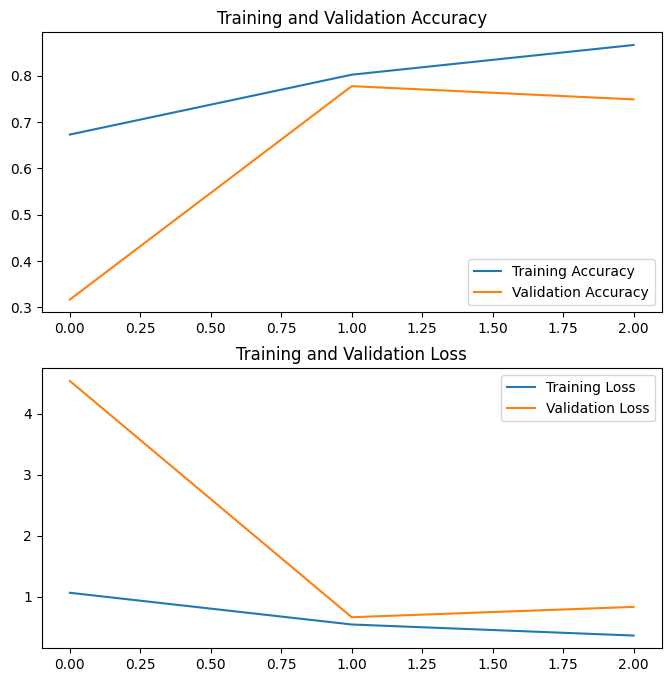

In [32]:
acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']

loss = history12.history['loss']
val_loss = history12.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
# model 12a
#model 7 + filters 16,32,64 + 4th layer
from keras.layers import BatchNormalization 
# model 12 : adding additional layer + padding + strides + batch normalization to all
model12a = keras.Sequential()
model12a.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model12a.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model12a.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12a.add(BatchNormalization())
model12a.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model12a.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12a.add(BatchNormalization())
model12a.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))# additional layer
model12a.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12a.add(BatchNormalization())
model12a.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu'))
model12a.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12a.add(BatchNormalization())


model12a.add(keras.layers.Flatten())
model12a.add(keras.layers.Dense(128, activation='relu'))
model12a.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model12a.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
# Fit the model.  We train for 3 epochs for now.
history12a = model12a.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 33s 90ms/step - loss: 0.9845 - accuracy: 0.6805 - val_loss: 1.4100 - val_accuracy: 0.4877
Epoch 2/3
350/350 [==============================] - 34s 96ms/step - loss: 0.5278 - accuracy: 0.8089 - val_loss: 3.9411 - val_accuracy: 0.4401
Epoch 3/3
350/350 [==============================] - 33s 95ms/step - loss: 0.3603 - accuracy: 0.8662 - val_loss: 0.8317 - val_accuracy: 0.7637


In [36]:
# model 12b
#model 7 + filters 16,32,64 + 5th layer
from keras.layers import BatchNormalization 
# model 12 : adding additional layer + padding + strides + batch normalization to all
model12b = keras.Sequential()
model12b.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model12b.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model12b.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12b.add(BatchNormalization())
model12b.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model12b.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12b.add(BatchNormalization())
model12b.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))# additional layer
model12b.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12b.add(BatchNormalization())
model12b.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))# additional layer
model12b.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12b.add(BatchNormalization())
model12b.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu'))
model12b.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model12b.add(BatchNormalization())


model12b.add(keras.layers.Flatten())
model12b.add(keras.layers.Dense(128, activation='relu'))
model12b.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model12b.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
# Fit the model.  We train for 3 epochs for now.
history12b = model12b.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 35s 94ms/step - loss: 0.8510 - accuracy: 0.6973 - val_loss: 1.8766 - val_accuracy: 0.3954
Epoch 2/3
350/350 [==============================] - 33s 93ms/step - loss: 0.5365 - accuracy: 0.8022 - val_loss: 0.7966 - val_accuracy: 0.7422
Epoch 3/3
350/350 [==============================] - 32s 92ms/step - loss: 0.4346 - accuracy: 0.8404 - val_loss: 0.6786 - val_accuracy: 0.7833


In [38]:
# model 13
#model 12 + filter size 5x5
from keras.layers import BatchNormalization 
# model 13 : adding additional layer + padding + strides + batch normalization to all
model13 = keras.Sequential()
model13.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model13.add(keras.layers.Conv2D(16, (5,5), padding='same',activation = 'relu'))
model13.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model13.add(BatchNormalization())
model13.add(keras.layers.Conv2D(32, (5,5), padding='same',activation = 'relu'))# additional layer
model13.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model13.add(BatchNormalization())
model13.add(keras.layers.Conv2D(64, (5,5),padding='same', activation = 'relu'))
model13.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model13.add(BatchNormalization())

model13.add(keras.layers.Flatten())
model13.add(keras.layers.Dense(128, activation='relu'))
model13.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model13.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [39]:
# Fit the model.  We train for 3 epochs for now.
history13 = model13.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 67s 188ms/step - loss: 1.1741 - accuracy: 0.5935 - val_loss: 2.5688 - val_accuracy: 0.3779
Epoch 2/3
350/350 [==============================] - 65s 184ms/step - loss: 0.7273 - accuracy: 0.7315 - val_loss: 1.4268 - val_accuracy: 0.5513
Epoch 3/3
350/350 [==============================] - 64s 184ms/step - loss: 0.5881 - accuracy: 0.7899 - val_loss: 1.4086 - val_accuracy: 0.5756


In [40]:
# model 14
#model 7 + filters 16,32,64 + L1
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization 
# model 14 : adding additional layer + padding + strides + batch normalization to all
model14 = keras.Sequential()
model14.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model14.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1(l1=1e-5)))
model14.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model14.add(BatchNormalization())
model14.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1(l1=1e-5)))# additional layer
model14.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model14.add(BatchNormalization())
model14.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu',kernel_regularizer=regularizers.L1(l1=1e-5)))
model14.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model14.add(BatchNormalization())

model14.add(keras.layers.Flatten())
model14.add(keras.layers.Dense(128, activation='relu'))
model14.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model14.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
# Fit the model.  We train for 3 epochs for now.
history14 = model14.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 35s 97ms/step - loss: 1.2202 - accuracy: 0.6506 - val_loss: 2.6650 - val_accuracy: 0.4448
Epoch 2/3
350/350 [==============================] - 34s 96ms/step - loss: 0.5927 - accuracy: 0.7910 - val_loss: 0.7971 - val_accuracy: 0.7422
Epoch 3/3
350/350 [==============================] - 33s 95ms/step - loss: 0.4345 - accuracy: 0.8461 - val_loss: 1.0779 - val_accuracy: 0.7054


# model 15
#model 7 + filters 16,32,64 + L1
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization 
# model 14 : adding additional layer + padding + strides + batch normalization to all
model15 = keras.Sequential()
model15.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model15.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1(l1=1e-5)))
model15.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model15.add(BatchNormalization())
model14.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1(l1=1e-5)))# additional layer
model15.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model15.add(BatchNormalization())
model15.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu',kernel_regularizer=regularizers.L1(l1=1e-5)))
model15.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model15.add(BatchNormalization())

model15.add(keras.layers.Flatten())
model15.add(keras.layers.Dense(128, activation='relu'))
model15.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model15.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model.  We train for 3 epochs for now.
history15 = model15.fit(train_dataset, epochs=3, validation_data=valid_dataset)

In [43]:
# model 16
#model 12 +L2
#model 7 + filters 16,32,64
from keras.layers import BatchNormalization 
from tensorflow.keras import layers
from tensorflow.keras import regularizers
# model 12 : adding additional layer + padding + strides + batch normalization to all
model16 = keras.Sequential()
model16.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model16.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L2(l2=1e-4)))
model16.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model16.add(BatchNormalization())
model16.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L2(l2=1e-4)))# additional layer
model16.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model16.add(BatchNormalization())
model16.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu',kernel_regularizer=regularizers.L2(l2=1e-4)))
model16.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model16.add(BatchNormalization())


model16.add(keras.layers.Flatten())
model16.add(keras.layers.Dense(128, activation='relu'))
model16.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model16.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
history16 = model16.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 35s 98ms/step - loss: 1.1592 - accuracy: 0.6744 - val_loss: 3.5439 - val_accuracy: 0.4033
Epoch 2/3
350/350 [==============================] - 34s 96ms/step - loss: 0.5253 - accuracy: 0.8112 - val_loss: 0.7721 - val_accuracy: 0.7605
Epoch 3/3
350/350 [==============================] - 34s 96ms/step - loss: 0.3476 - accuracy: 0.8783 - val_loss: 0.9022 - val_accuracy: 0.7358


In [45]:
# model 17
#model 12 +L2 + L1L2
#model 7 + filters 16,32,64
from keras.layers import BatchNormalization 
from tensorflow.keras import layers
from tensorflow.keras import regularizers
# model 12 : adding additional layer + padding + strides + batch normalization to all
model17 = keras.Sequential()
model17.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model17.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
model17.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model17.add(BatchNormalization())
model17.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))# additional layer
model17.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model17.add(BatchNormalization())
model17.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
model17.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model17.add(BatchNormalization())


model17.add(keras.layers.Flatten())
model17.add(keras.layers.Dense(128, activation='relu'))
model17.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model17.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [46]:
history17 = model17.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 36s 100ms/step - loss: 1.0694 - accuracy: 0.6791 - val_loss: 2.2951 - val_accuracy: 0.4415
Epoch 2/3
350/350 [==============================] - 35s 99ms/step - loss: 0.5855 - accuracy: 0.7940 - val_loss: 0.6941 - val_accuracy: 0.7690
Epoch 3/3
350/350 [==============================] - 35s 100ms/step - loss: 0.4148 - accuracy: 0.8557 - val_loss: 0.7675 - val_accuracy: 0.7472


In [51]:
# model 18
#model 12 +L2 + L1L2
#model 7 + filters 16,32,64
from keras.layers import BatchNormalization 
from tensorflow.keras import layers
from tensorflow.keras import regularizers
# model 12 : adding additional layer + padding + strides + batch normalization to all
model18 = keras.Sequential()
model18.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model18.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
model18.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model18.add(BatchNormalization())
model18.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))# additional layer
model18.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model18.add(BatchNormalization())
model18.add(keras.layers.Conv2D(64, (3,3),padding='same', activation = 'relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
model18.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
#model05.add(keras.layers.SpatialDropout2D(0.25))
model18.add(BatchNormalization())


model18.add(keras.layers.Flatten())

model18.add(keras.layers.Dense(128, activation='relu'))
model18.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model18.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [52]:
history18 = model18.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 36s 98ms/step - loss: 1.1793 - accuracy: 0.6667 - val_loss: 2.5716 - val_accuracy: 0.3886
Epoch 2/3
350/350 [==============================] - 34s 97ms/step - loss: 0.5756 - accuracy: 0.7986 - val_loss: 0.7818 - val_accuracy: 0.7462
Epoch 3/3
350/350 [==============================] - 34s 97ms/step - loss: 0.3936 - accuracy: 0.8607 - val_loss: 0.8244 - val_accuracy: 0.7647


### Examine the results for some validation examples.

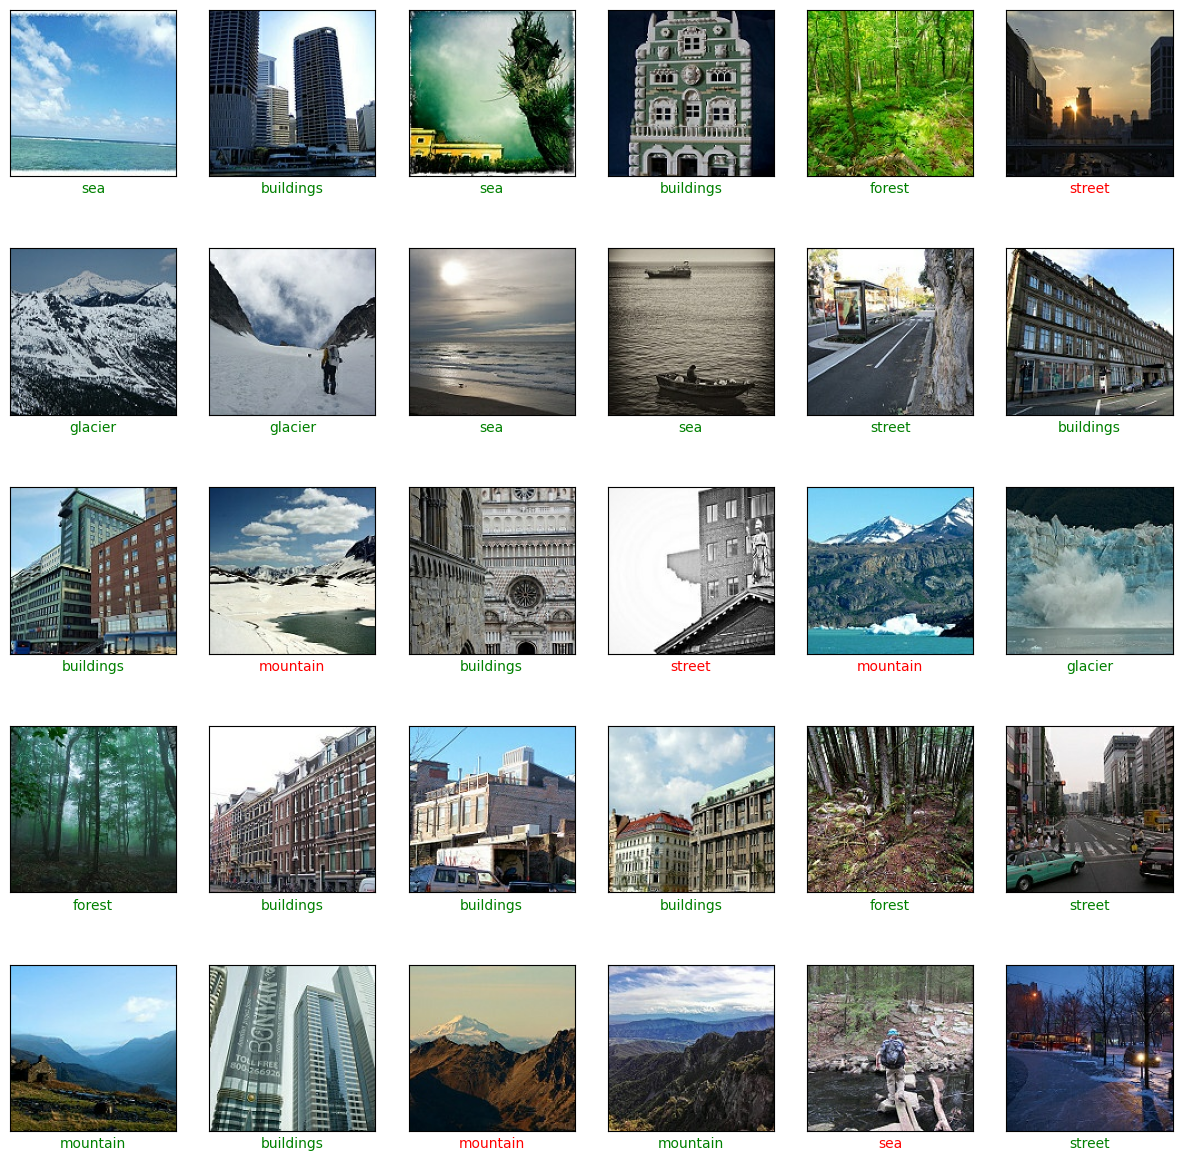

In [53]:
#Visualize 30 of the predicted data with green label for correct predictions
#and red label vise versa.
plt.figure(figsize=(15,15))
for images, labels in valid_dataset.take(1):
    for i in range(30):
        prediction = model12.predict(images[i].numpy().reshape(1,img_height, img_width,3), verbose=0)
        plt.subplot(5, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.grid(False)
        xlabel = plt.xlabel(class_names[prediction.argmax()])
        if (prediction.argmax() == labels[i].numpy().argmax()):
            xlabel.set_color("green")
        else:
            xlabel.set_color("red")
plt.show()

### Make Predictions for Test_Pred data.  
#### Note: Results are stored in a dictionary, which is keyed by file numbers (as integers).

In [54]:
# Load the test_pred data (which has no target labels)
import os
import cv2

pred_directory = '../input/csc-578-hw7-fall-2023/test_pred'
result_dict = {} # dictionary to store predictions (keyed by file number)

print ("predicting for testset...")
# iterate over files in that directory
for filename in os.listdir(pred_directory):
    f = os.path.join(pred_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        fnum = int(filename[:-4]) # filename e.g. '103.jpg" -> 103
        img = cv2.imread(f)
        ### 11/3/2023 update -- NO further image normalization is necessary for the test data.
        ### img = img/255.0
        img = img.reshape(-1,img_height, img_width,3)
        pred = model12.predict(img, verbose=0)
        result_dict[fnum] = pred[0]  # [0] because there is only one data
print (f'  -- done, {len(result_dict)} test instances predicted.')

predicting for testset...
  -- done, 2993 test instances predicted.


**Creating a csv file**

In [55]:
import pandas as pd

data = pd.DataFrame.from_dict(result_dict, orient='index', columns=['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'])
data.reset_index(inplace=True)
data = data.rename(columns={'index': 'fnum'})
data.sort_values(by=['fnum'], inplace=True)  # Sorting the DataFrame in-place
data.to_csv('submissionf.csv', index=False)

In [56]:
# Load the CSV file into a DataFrame
data = pd.read_csv('submissionf.csv')

# Display the DataFrame
print(data)

       fnum  buildings    forest   glacier      mountain       sea    street
0     20056   0.000002  0.999924  0.000009  1.307591e-07  0.000001  0.000064
1     20057   0.806937  0.019811  0.024751  2.670363e-02  0.068243  0.053555
2     20058   0.013545  0.010100  0.206395  3.935099e-01  0.372506  0.003944
3     20059   0.240557  0.037377  0.361137  9.523219e-02  0.165627  0.100070
4     20060   0.225394  0.372092  0.000961  3.974684e-03  0.059284  0.338294
...     ...        ...       ...       ...           ...       ...       ...
2988  24325   0.009122  0.000380  0.045959  2.148161e-01  0.729718  0.000006
2989  24328   0.291255  0.006091  0.115501  3.451215e-01  0.234122  0.007909
2990  24329   0.039414  0.002789  0.075590  5.687589e-01  0.310410  0.003037
2991  24332   0.964168  0.002618  0.001469  4.736919e-04  0.000455  0.030816
2992  24334   0.009206  0.002198  0.184347  1.172862e-01  0.682104  0.004859

[2993 rows x 7 columns]
